In [1]:

import numpy as np
import os
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Reshape, Input, Conv2D, Conv2DTranspose, Dropout, LeakyReLU
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# Define generator model
def build_generator():
    model = Sequential()
    model.add(Dense(128 * 16 * 16, activation="relu", input_dim=latent_dim))
    model.add(Reshape((16, 16, 128)))
    
    model.add(Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"))
    
    model.add(Conv2DTranspose(64, kernel_size=4, strides=2, padding="same"))
    
    model.add(Conv2DTranspose(1, kernel_size=4, strides=2, padding="same", activation="tanh"))
    model.summary()
    noise = Input(shape=(latent_dim,))
    img = model(noise)
    return Model(noise, img)

# Define discriminator model
def build_discriminator():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=4, strides=2, padding="same", input_shape=img_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, kernel_size=4, strides=2, padding="same"))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, kernel_size=4, strides=2, padding="same"))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(1, activation="sigmoid"))
    model.summary()
    img = Input(shape=img_shape)
    validity = model(img)
    return Model(img, validity)

In [3]:
img_shape = (128, 128, 1)
learning_rate = 0.0002
beta_1 = 0.5
latent_dim = 100

# Build and compile discriminator model
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=learning_rate, beta_1=beta_1), metrics=['accuracy'])

# Build and compile generator model
generator = build_generator()
generator.compile(loss='binary_crossentropy', optimizer=Adam(lr=learning_rate, beta_1=beta_1))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        544       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        32832     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       1

C:\Users\revolver\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32768)             3309568   
                                                                 
 reshape_2 (Reshape)         (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 32, 32, 128)      262272    
 ranspose)                                                       
                                                                 
 conv2d_transpose_7 (Conv2DT  (None, 64, 64, 64)       131136    
 ranspose)                                                       
                                                                 
 conv2d_transpose_8 (Conv2DT  (None, 128, 128, 1)      1025      
 ranspose)                                                       
                                                      

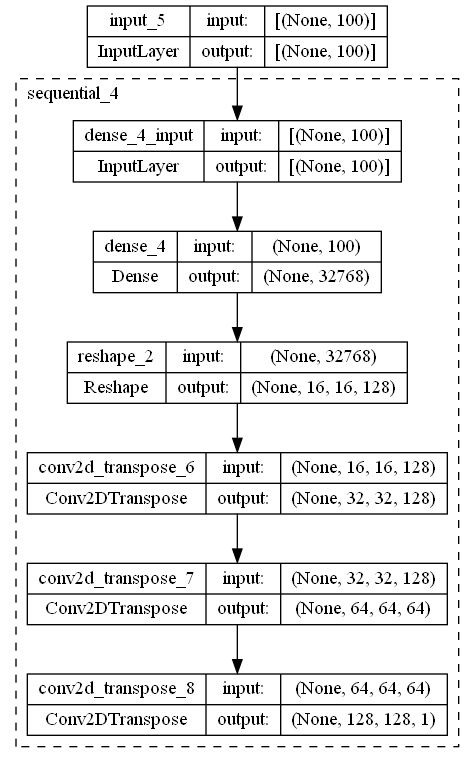

In [6]:
from tensorflow.keras.utils import plot_model

# Visualize the generator model
generator = build_generator()
plot_model(generator, to_file='generator.png', show_shapes=True, show_layer_names=True, expand_nested=True)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        544       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 dropout_6 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        32832     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                                 
 dropout_7 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 128)      

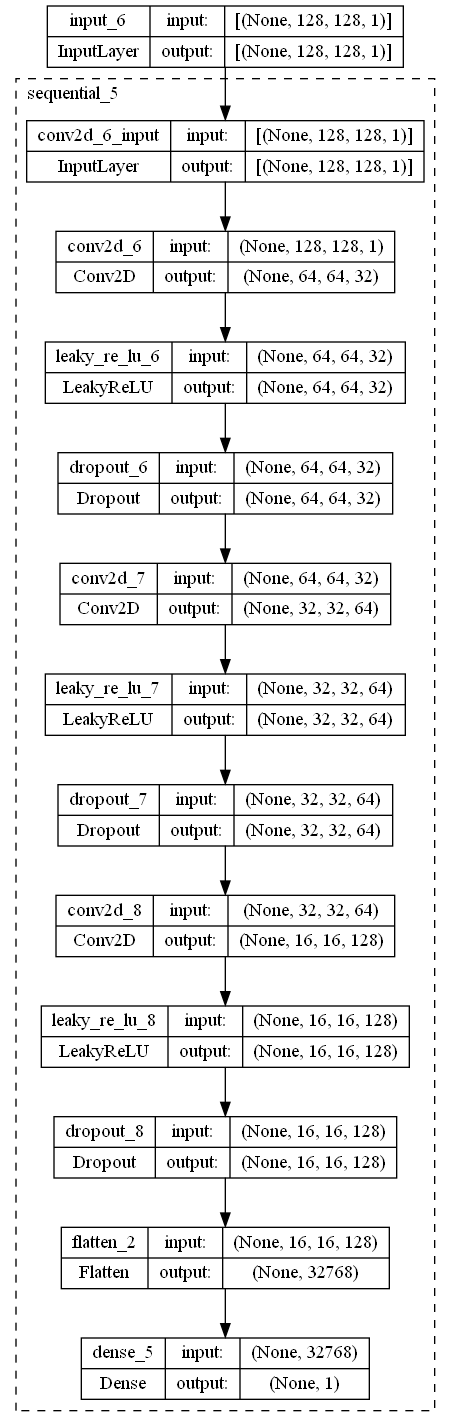

In [7]:
# Visualize the discriminator model
discriminator = build_discriminator()
plot_model(discriminator, to_file='discriminator.png', show_shapes=True, show_layer_names=True, expand_nested=True)
